Diabetes Prediction
Problem Statement: To create a predictive model that can accurately predict onset of diabetes based on a set of relevant features.

Project Objective:

The primary goal is to develop a precise predictive model capable of identitying likelihood of onset of diabetes.

Dataset:

This project uses the kaggle dataset - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/code

Methodology:

Data Preprocessing: Data preprocessing includes addressing missing values, duplicates and scaling for comprehensive analysis.

Model Development: A range of machine learning algorithms are used to develop and train predictive models to maximise robustness and accuracy.

Model Evaluation: The models are evaluated using metrics including accuracy, precision, recall, and F1-score to gauge their effectiveness.

Results and Impact:

The successful creation of the prediction model holds transformative potential for healthcare professionals. Early diagnosis facilitated by this model can significantly enhance treatments and patient outcomes. This project stands as a pivotal showcase for use of medical data analysis and machine learning in shaping the future of healthcare.

Step 1: Data Exploration

In [183]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')
     

In [184]:
# Load Dataset
import pandas as pd
df = pd.read_csv('../data/diabetes.csv')

In [185]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [186]:
# View last 5 rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [187]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  768
Number of columns are:  9


In [188]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [189]:
# Checking Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [190]:
# Checking missing values/null values count for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

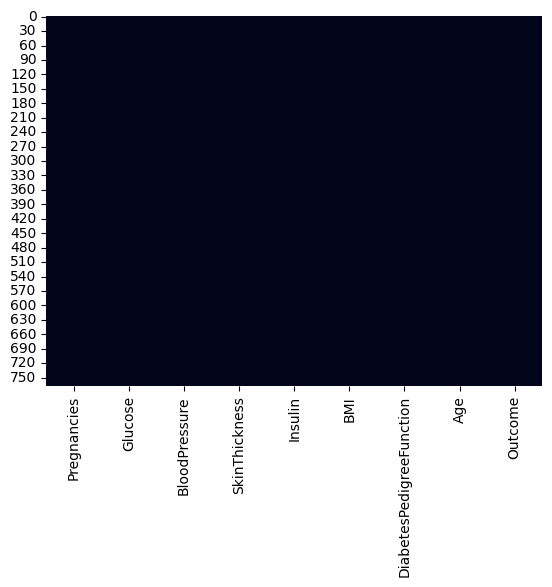

In [191]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [192]:
# Dataset Columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [193]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [194]:
# Check Unique Values for each variable using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Pregnancies is 17
No. of unique values in Glucose is 136
No. of unique values in BloodPressure is 47
No. of unique values in SkinThickness is 51
No. of unique values in Insulin is 186
No. of unique values in BMI is 248
No. of unique values in DiabetesPedigreeFunction is 517
No. of unique values in Age is 52
No. of unique values in Outcome is 2


Observations:
There are a total of 9 feature columns including 'Outcome' which is the dependent target column.

The total number of observations(rows) are 768.

There are no duplicate rows or missing values in this dataset.

Data Vizualization : Analysing the relationships between variables

Chart - 1 : Target Column Distribution

Outcome
0    500
1    268
Name: count, dtype: int64
 


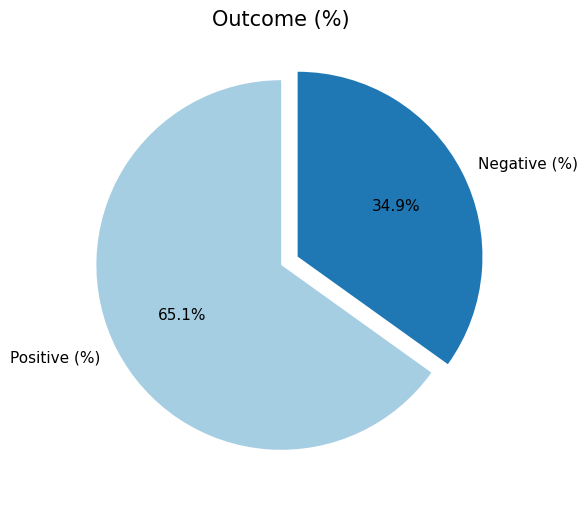

In [195]:
# Chart - 1 Visualization code for Distribution of dependent varaible - diagnosis

# Dependant Column Value Counts
print(df.Outcome.value_counts())
print(" ")

# Color palette selection
colors = sns.color_palette("Paired")

# Plotting data on chart
plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(df['Outcome'].value_counts(), labels=['Positive (%)','Negative (%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Outcome (%)', fontsize=15)

# Displaying chart
plt.show()

Chart - 2 : Correlation Heatmap

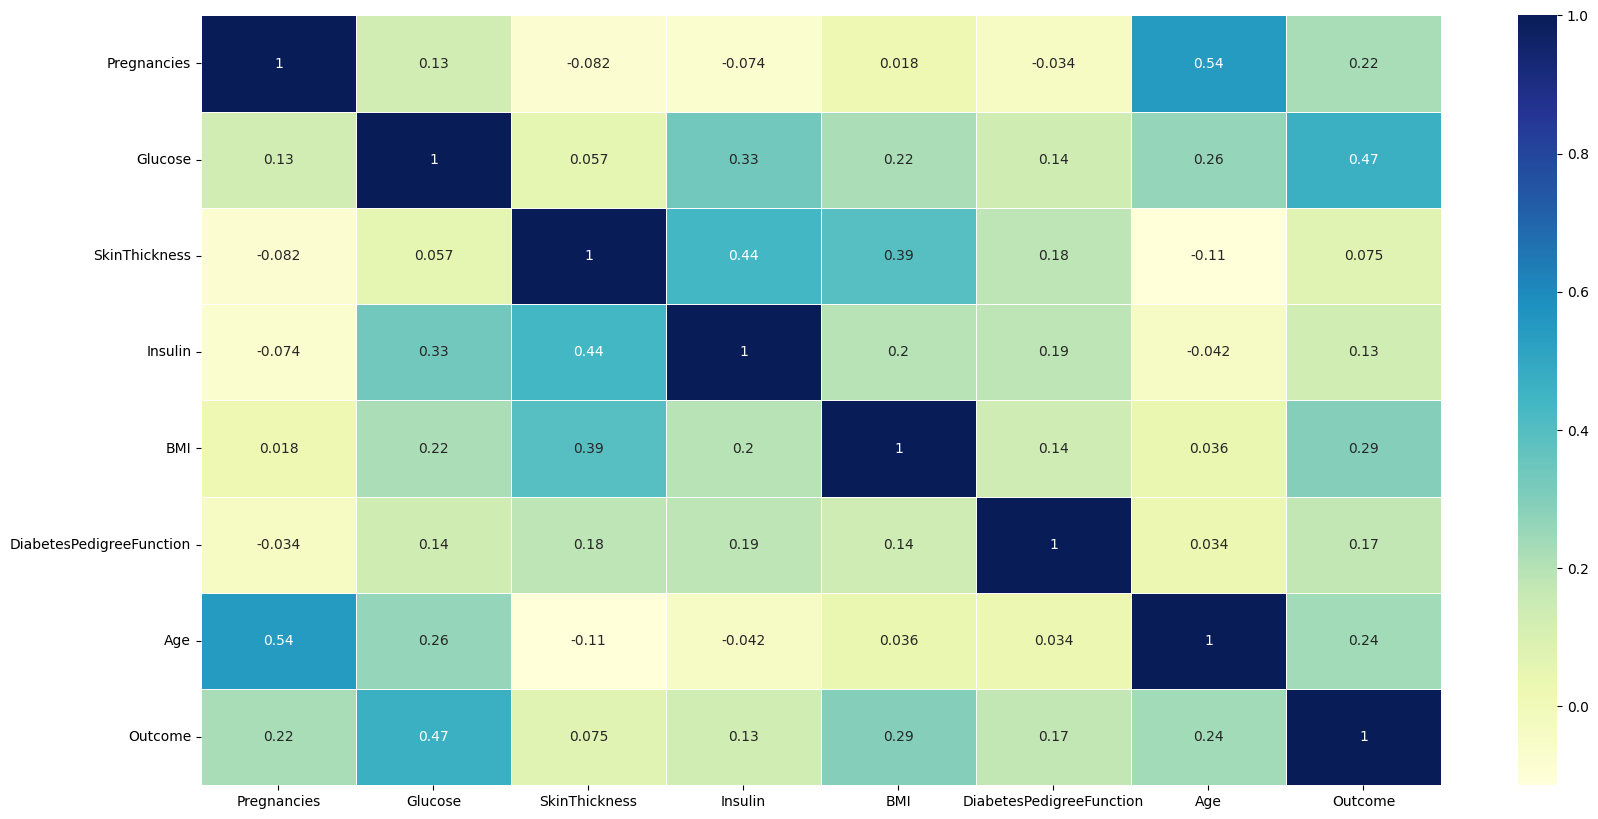

In [269]:
# Correlation Heatmap visualization code
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(20,10))

# Generate a correlation heatmap for the selected data
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=.5,cmap="YlGnBu")

# Display the heatmap
plt.show()

Chart - 3 : Pair Plot

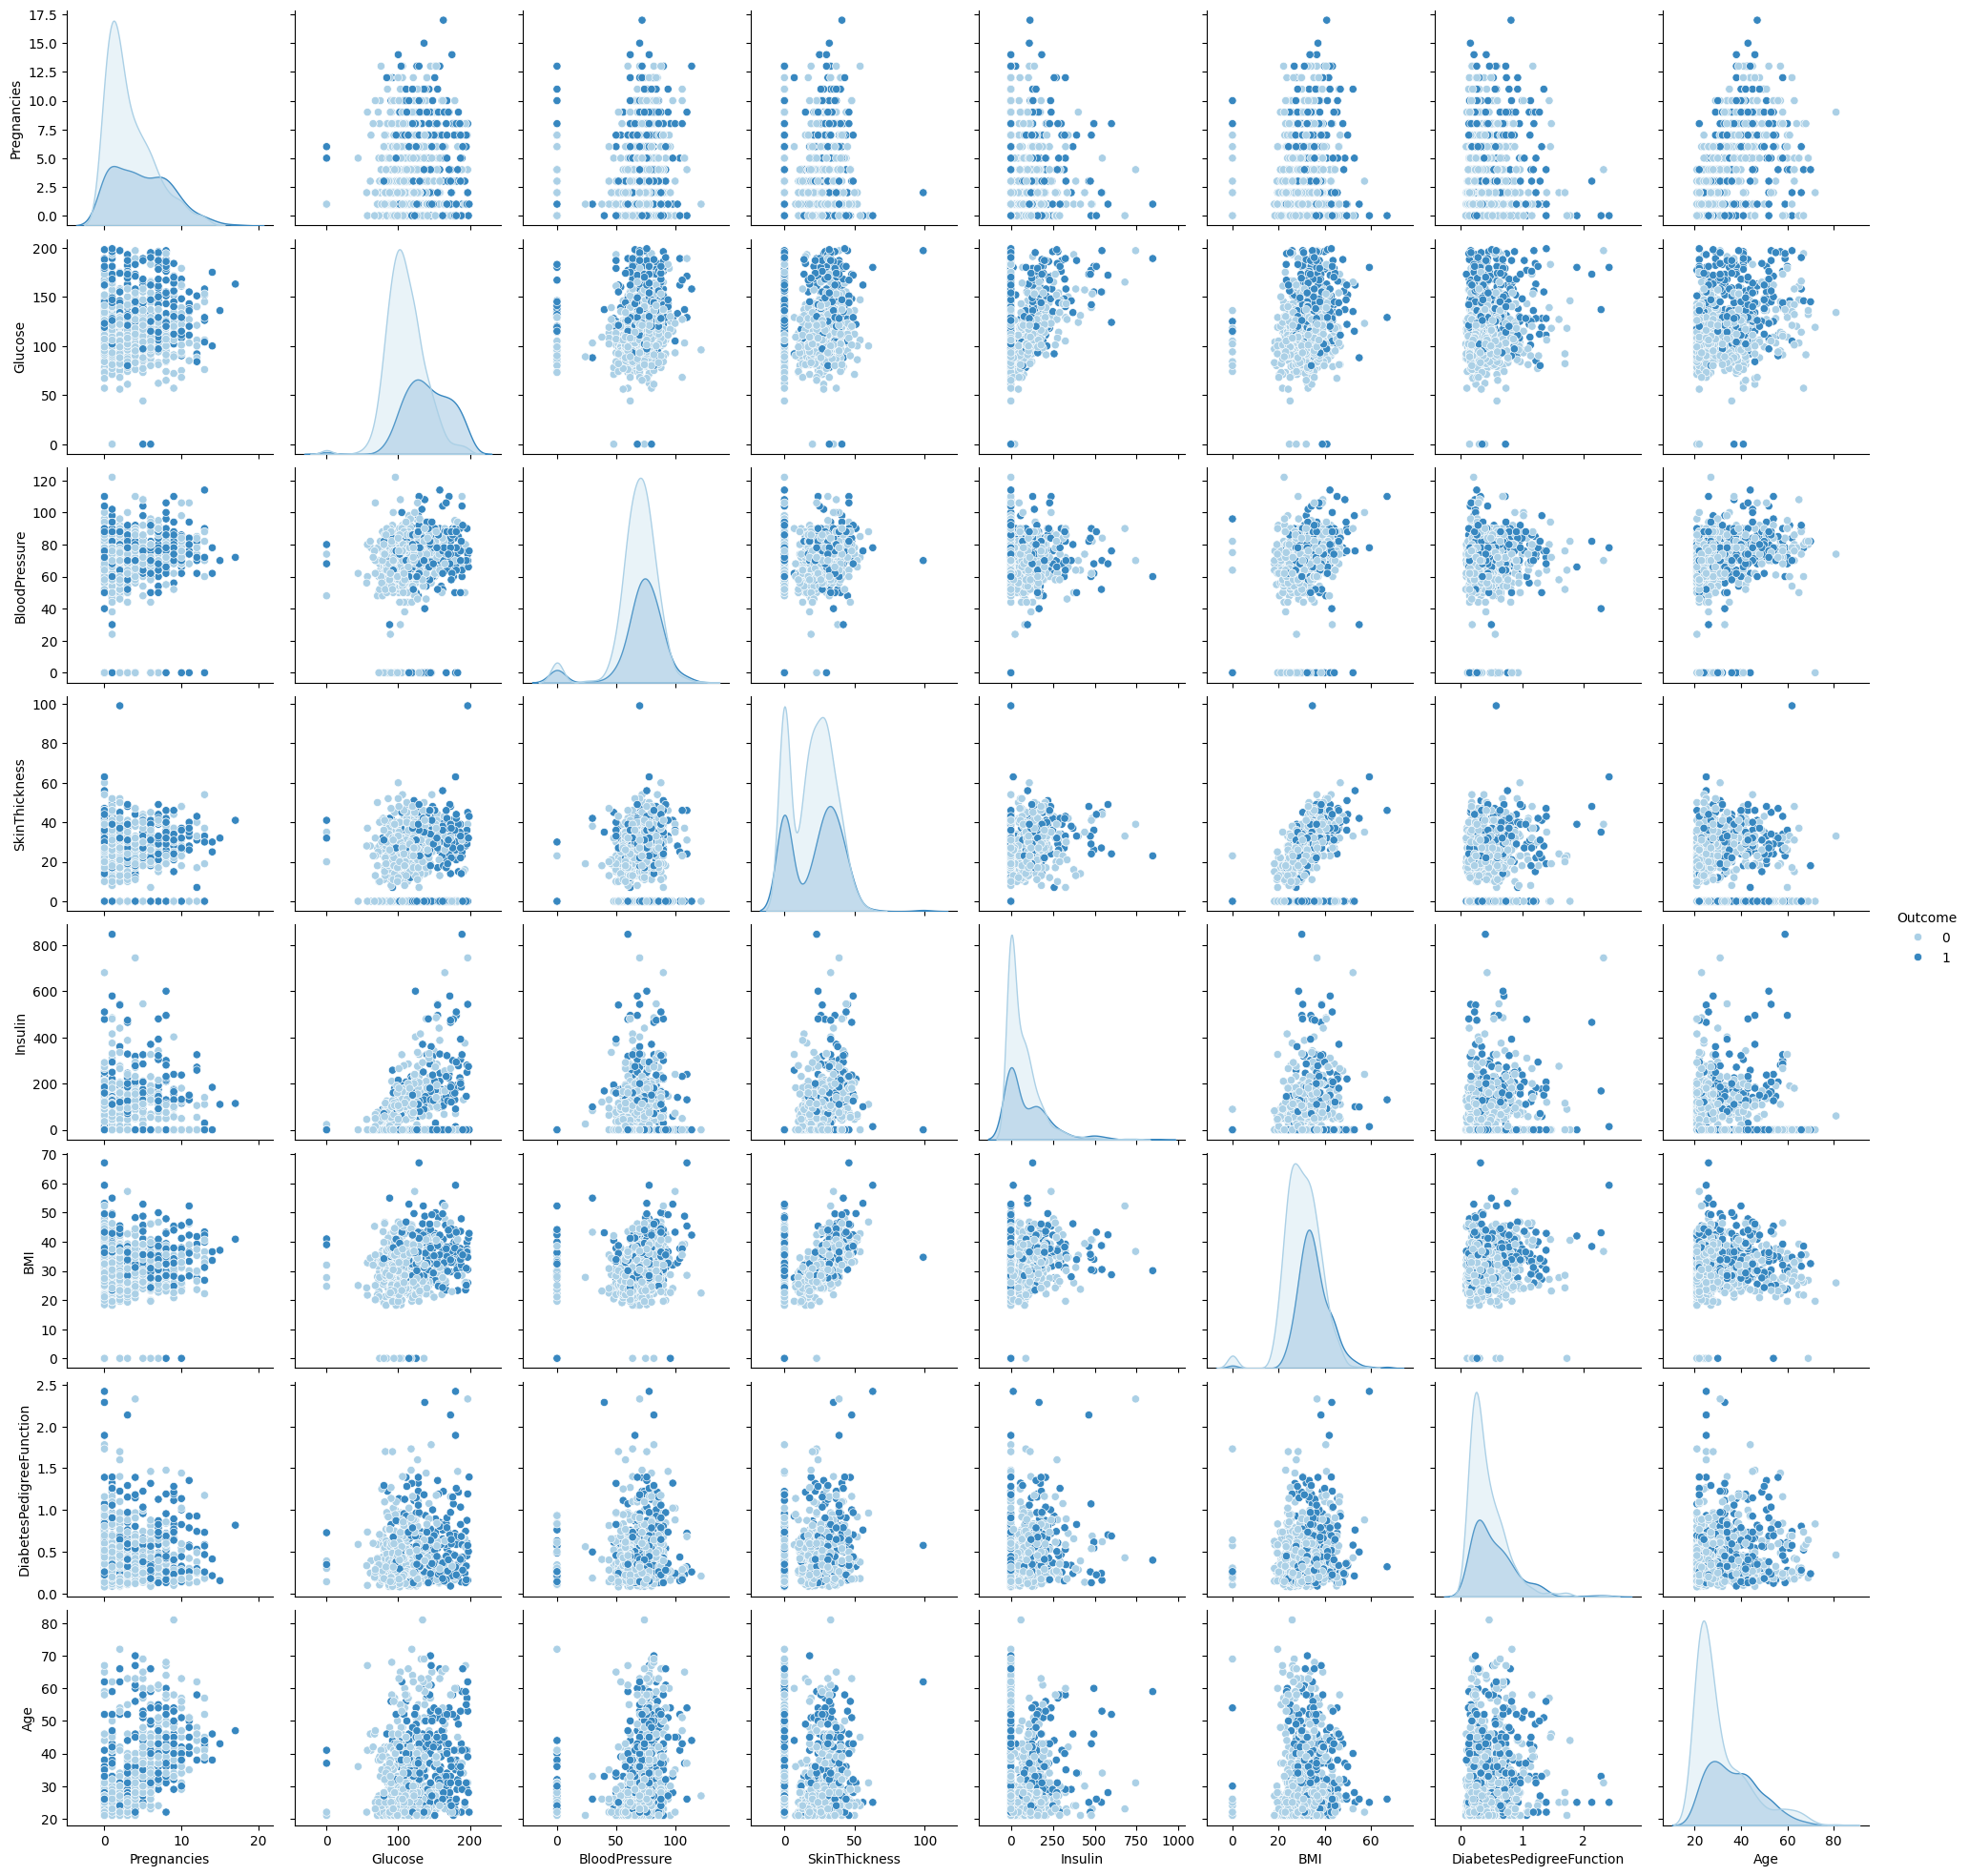

In [197]:
# Pairplot for mean columns
sns.pairplot(df, hue='Outcome', palette='Blues')

# Display Chart
plt.show()

Step 2 : Feature Engineering and Data Preprocessing

In [198]:
# All features present are relevant and selected for further analysis
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [271]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

# check for corealation and remove redundant features
correalation_matrix = df[numerical_features].corr()

correlated_features = set()
for i in range(len(correalation_matrix.columns)):
    for j in range(i):
        if abs(correalation_matrix.iloc[i,j]) > 0.9:
            correlated_features.add(correalation_matrix.columns[i])

correalation_matrix

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
SkinThickness,-0.081672,0.057328,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [273]:
print("{} correlated_features {}".format(len(correlated_features), correlated_features))

numerical_features = [feature for feature in numerical_features if feature not in correlated_features]

df.drop(columns=correlated_features, inplace=True)

0 correlated_features set()


In [ ]:
# ANOVA Test for numerical features
# perform ANOVA test to determine the significance of continuous features
from scipy.stats import f_oneway

Positive = df[df['Outcome'] == 1]
Negative = df[df['Outcome'] == 0]

anova_results = {}
for feature in continuous_features:
    stat, p_value = f_oneway(Positive[feature], Negative[feature])
    anova_results[feature] = p_value
significant_features = {feature: p for feature, p in anova_results.items() if p < 0.05}
not_significant_featurs = {feature: p for feature, p in anova_results.items() if p >= 0.05}
print("{} not significant features {}".format(len(not_significant_featurs), not_significant_featurs))
print("{} significant features based on ANOVA test".format(len(significant_features)))
for feature, p in significant_features.items():
    print(f"{feature}: p-value = {p}")

1 not significant features {'BloodPressure': np.float64(0.07151390009774597)}
6 significant features based on ANOVA test
Glucose: p-value = 8.935431645287785e-43
SkinThickness: p-value = 0.03834770482048335
Insulin: p-value = 0.0002861864603602735
BMI: p-value = 1.2298074873114395e-16
DiabetesPedigreeFunction: p-value = 1.2546070101485603e-06
Age: p-value = 2.2099754606650332e-11


In [200]:
# drop the not significant feature
df.drop(list(not_significant_featurs.keys()), axis=1, inplace=True)

In [201]:
df.head(5)

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1


Step 3: Prepare training and test datasets

In [202]:
# Defining the X and y
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [203]:
# Splitting the data into training and testing sets
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

Data Scaling for numerical features

In [205]:
# Create a StandardScaler object to standardize the data
scaler = StandardScaler()

# Apply the StandardScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

Step 3 : Machine Learning model trianing and evaluation

In [206]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The generic function accepts inputs: model, x train, x test, y train, y test.
    It will fit the model, make predictions on the trained model, and provide the metrics and classification report for train and test datasets
    Outputs:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [207]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])


Candidate Model 1: Logistic Regression

In [208]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model
     


Train ROC AUC: 0.7194923489398569
Test ROC AUC: 0.7363636363636363


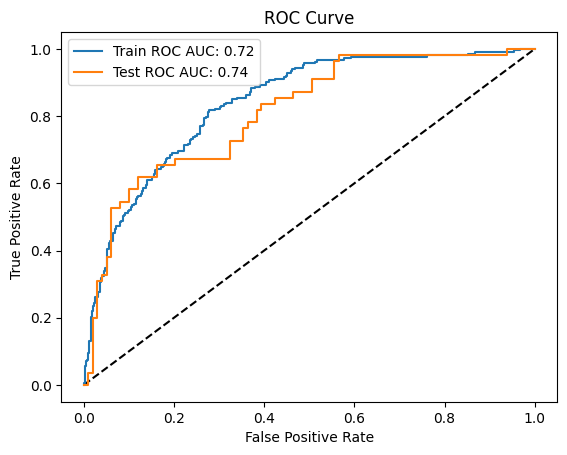


Confusion Matrix:


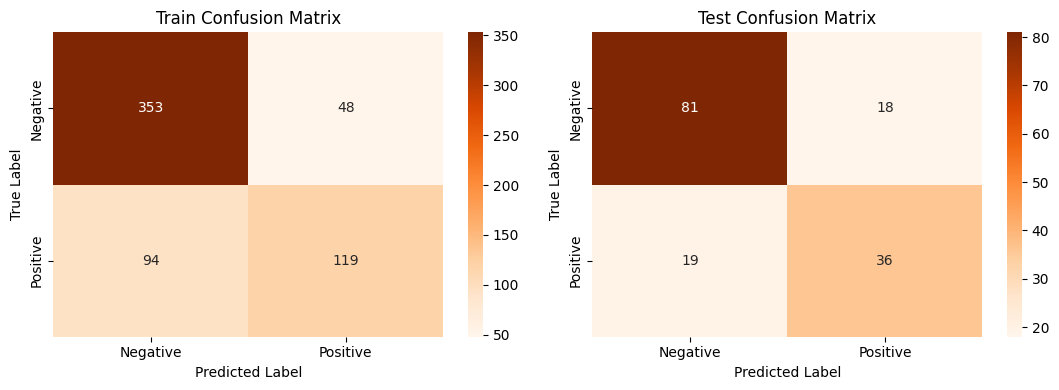


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.789709 | 0.880299 |   0.832547 | 401       |
| 1            |    0.712575 | 0.558685 |   0.626316 | 213       |
| accuracy     |    0.76873  | 0.76873  |   0.76873  |   0.76873 |
| macro avg    |    0.751142 | 0.719492 |   0.729431 | 614       |
| weighted avg |    0.762951 | 0.76873  |   0.761004 | 614       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.81     | 0.818182 |   0.81407  |  99       |
| 1            |    0.666667 | 0.654545 |   0.66055  |  55       |
| accuracy     |    0.75974  | 0.75974  |   0.75974  |   0.75974 |
| macro avg    |    0.738333 | 0.736364 |   0.73731  | 154       |
| weighted avg |    0.75881  | 0.75974  |   0.759242 | 154       |


In [209]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)
     

In [210]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.762951
Precision Test,0.758810
Recall Train,0.768730
Recall Test,0.759740
Accuracy Train,0.768730
Accuracy Test,0.759740
ROC-AUC Train,0.719492
ROC-AUC Test,0.736364
F1 macro Train,0.761004
F1 macro Test,0.759242


Cross- Validation & Hyperparameter Tuning for Candidate Model 1 using GridSearchCV

In [211]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [212]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)
     


Train ROC AUC: 0.7169985833538219
Test ROC AUC: 0.7363636363636363


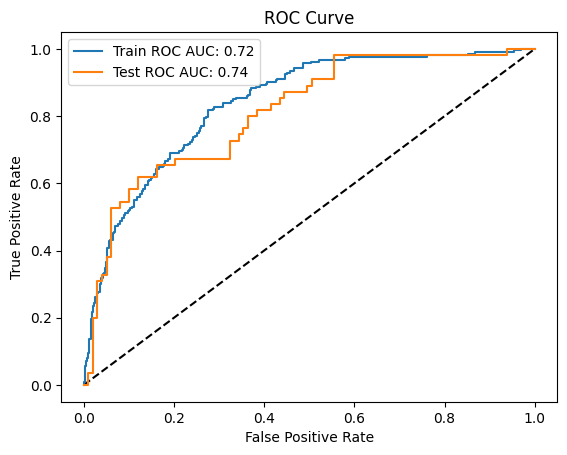


Confusion Matrix:


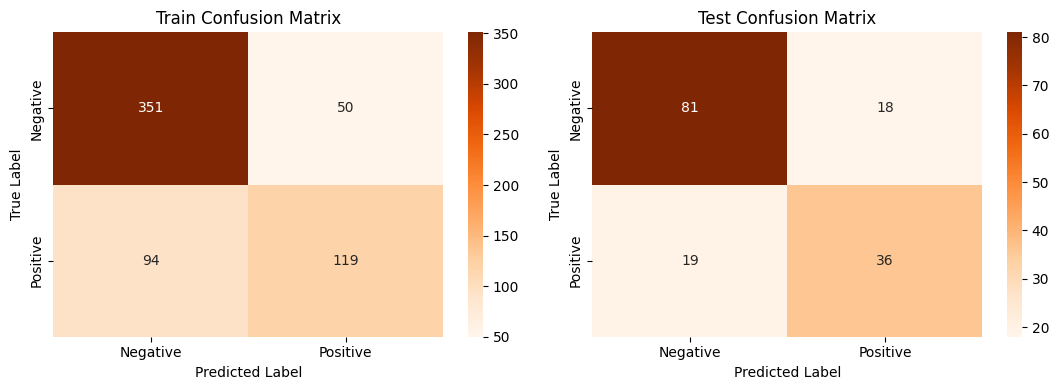


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.788764 | 0.875312 |   0.829787 | 401        |
| 1            |    0.704142 | 0.558685 |   0.623037 | 213        |
| accuracy     |    0.765472 | 0.765472 |   0.765472 |   0.765472 |
| macro avg    |    0.746453 | 0.716999 |   0.726412 | 614        |
| weighted avg |    0.759408 | 0.765472 |   0.758064 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.81     | 0.818182 |   0.81407  |  99       |
| 1            |    0.666667 | 0.654545 |   0.66055  |  55       |
| accuracy     |    0.75974  | 0.75974  |   0.75974  |   0.75974 |
| macro avg    |    0.738333 | 0.736364 |   0.73731  | 154       |
| weighted avg |    0.75881  | 0.75974  |   0.759242 | 154     

In [213]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [214]:
score['Logistic regression tuned'] = lr_score2

compare model performance

In [215]:
score

,Logistic regression,Logistic regression tuned
Precision Train,0.762951,0.759408
Precision Test,0.758810,0.758810
Recall Train,0.768730,0.765472
Recall Test,0.759740,0.759740
Accuracy Train,0.768730,0.765472
Accuracy Test,0.759740,0.759740
ROC-AUC Train,0.719492,0.716999
ROC-AUC Test,0.736364,0.736364
F1 macro Train,0.761004,0.758064
F1 macro Test,0.759242,0.759242


Candidate Model 2: Decision Tree Classifier

In [216]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 1.0
Test ROC AUC: 0.792929292929293


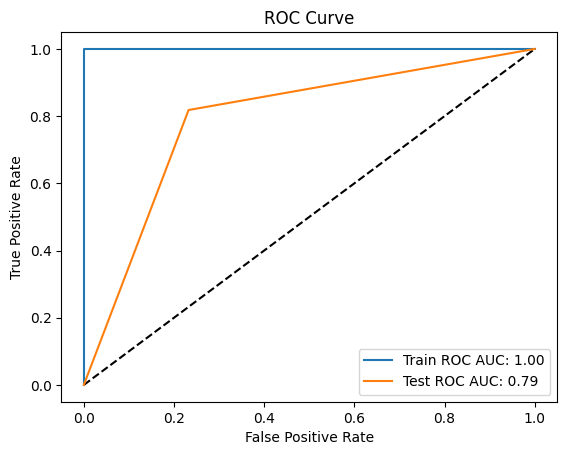


Confusion Matrix:


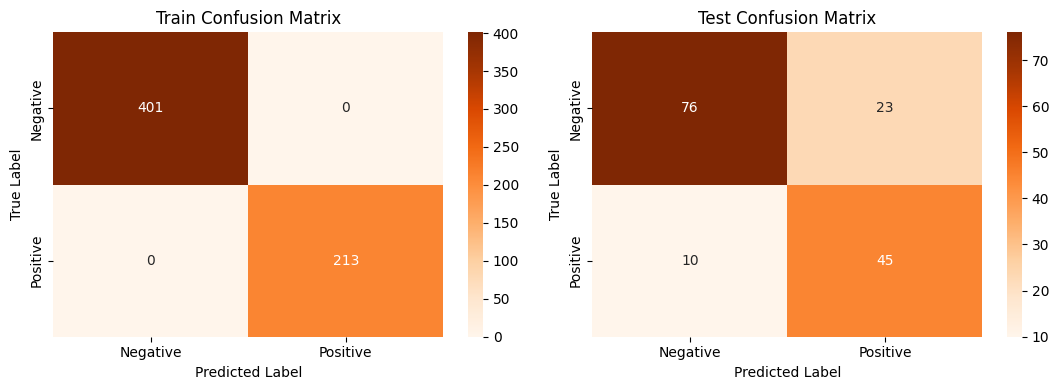


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       401 |
| 1            |           1 |        1 |          1 |       213 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       614 |
| weighted avg |           1 |        1 |          1 |       614 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.883721 | 0.767677 |   0.821622 |  99        |
| 1            |    0.661765 | 0.818182 |   0.731707 |  55        |
| accuracy     |    0.785714 | 0.785714 |   0.785714 |   0.785714 |
| macro avg    |    0.772743 | 0.792929 |   0.776664 | 154        |
| weighted avg |    0.804451 | 0.785714 |   0.789509 | 154      

In [217]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [218]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.762951,0.759408,1.000000
Precision Test,0.758810,0.758810,0.804451
Recall Train,0.768730,0.765472,1.000000
Recall Test,0.759740,0.759740,0.785714
Accuracy Train,0.768730,0.765472,1.000000
Accuracy Test,0.759740,0.759740,0.785714
ROC-AUC Train,0.719492,0.716999,1.000000
ROC-AUC Test,0.736364,0.736364,0.792929
F1 macro Train,0.761004,0.758064,1.000000
F1 macro Test,0.759242,0.759242,0.789509


Cross- Validation & Hyperparameter Tuning

In [219]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': np.int64(18), 'min_samples_split': np.int64(3)}


In [220]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.7885216536124477
Test ROC AUC: 0.7454545454545455


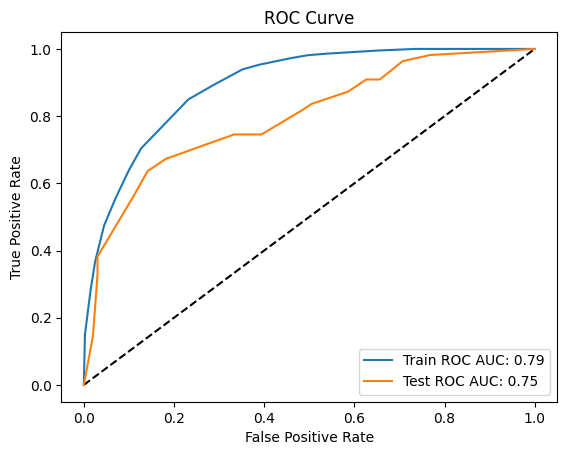


Confusion Matrix:


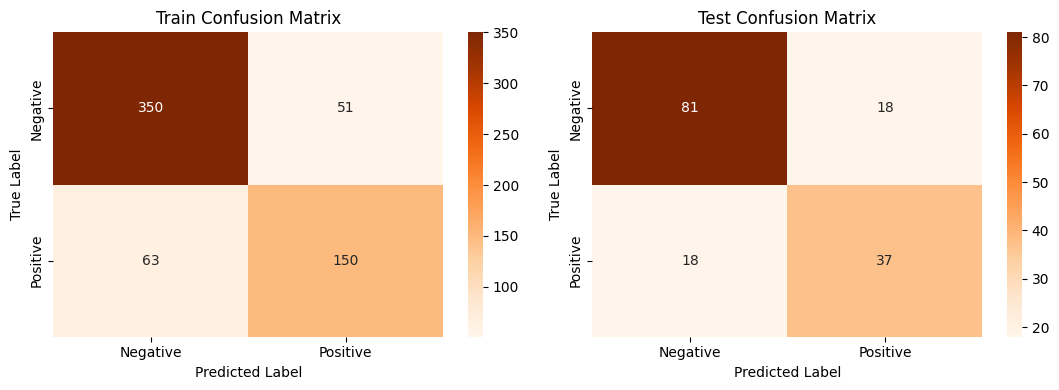


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.847458 | 0.872818 |   0.859951 | 401        |
| 1            |    0.746269 | 0.704225 |   0.724638 | 213        |
| accuracy     |    0.814332 | 0.814332 |   0.814332 |   0.814332 |
| macro avg    |    0.796863 | 0.788522 |   0.792294 | 614        |
| weighted avg |    0.812355 | 0.814332 |   0.81301  | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.818182 | 0.818182 |   0.818182 |  99        |
| 1            |    0.672727 | 0.672727 |   0.672727 |  55        |
| accuracy     |    0.766234 | 0.766234 |   0.766234 |   0.766234 |
| macro avg    |    0.745455 | 0.745455 |   0.745455 | 154        |
| weighted avg |    0.766234 | 0.766234 |   0.766234 | 15

In [221]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_train, X_test, y_train, y_test)

In [222]:
score['Decision Tree tuned'] = dt2_score

Compare scores

In [223]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.762951,0.759408,1.000000,0.812355
Precision Test,0.758810,0.758810,0.804451,0.766234
Recall Train,0.768730,0.765472,1.000000,0.814332
Recall Test,0.759740,0.759740,0.785714,0.766234
Accuracy Train,0.768730,0.765472,1.000000,0.814332
Accuracy Test,0.759740,0.759740,0.785714,0.766234
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455
F1 macro Train,0.761004,0.758064,1.000000,0.813010
F1 macro Test,0.759242,0.759242,0.789509,0.766234


Candidate Model 3: Random Forest Classifier

In [224]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 1.0
Test ROC AUC: 0.7393939393939394


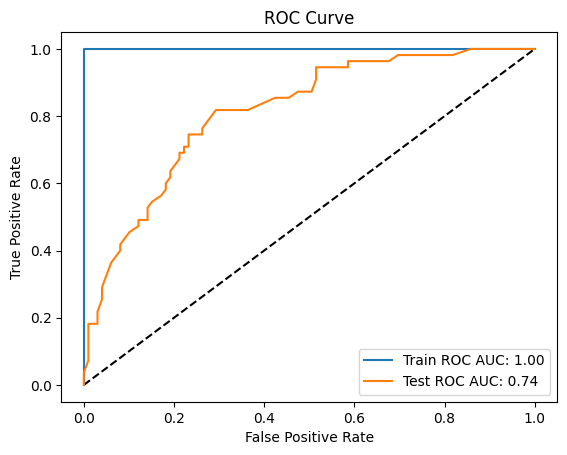


Confusion Matrix:


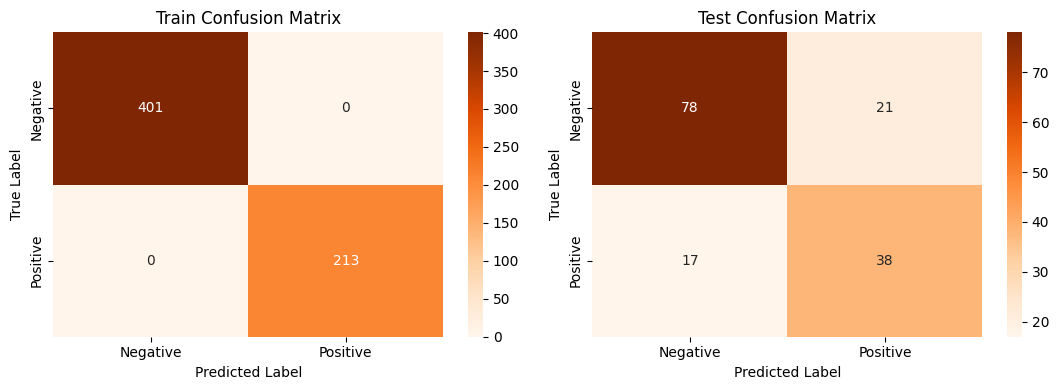


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       401 |
| 1            |           1 |        1 |          1 |       213 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       614 |
| weighted avg |           1 |        1 |          1 |       614 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.821053 | 0.787879 |   0.804124 |  99        |
| 1            |    0.644068 | 0.690909 |   0.666667 |  55        |
| accuracy     |    0.753247 | 0.753247 |   0.753247 |   0.753247 |
| macro avg    |    0.73256  | 0.739394 |   0.735395 | 154        |
| weighted avg |    0.757844 | 0.753247 |   0.755032 | 154      

In [225]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [226]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032


Cross- Validation & Hyperparameter Tuning

In [227]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 11}


In [228]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.8789645604299112
Test ROC AUC: 0.7444444444444445


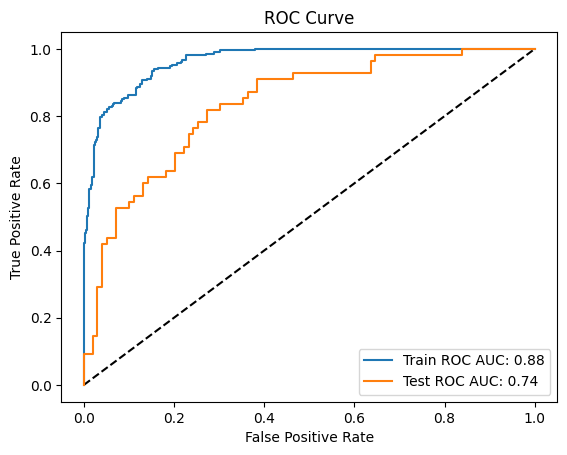


Confusion Matrix:


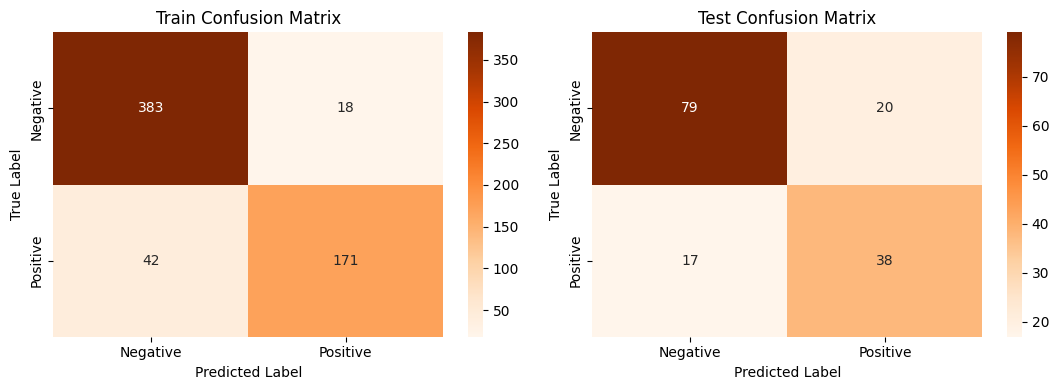


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.901176 | 0.955112 |   0.927361 | 401       |
| 1            |    0.904762 | 0.802817 |   0.850746 | 213       |
| accuracy     |    0.90228  | 0.90228  |   0.90228  |   0.90228 |
| macro avg    |    0.902969 | 0.878965 |   0.889054 | 614       |
| weighted avg |    0.90242  | 0.90228  |   0.900783 | 614       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.822917 | 0.79798  |   0.810256 |  99       |
| 1            |    0.655172 | 0.690909 |   0.672566 |  55       |
| accuracy     |    0.75974  | 0.75974  |   0.75974  |   0.75974 |
| macro avg    |    0.739045 | 0.744444 |   0.741411 | 154       |
| weighted avg |    0.763008 | 0.75974  |   0.761081 | 154       |


In [229]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_train, X_test, y_train, y_test)

In [230]:
score['Random Forest tuned'] = rf2_score

Compare scores

In [231]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081


Candidate Model 4: Support Vector Machine

In [232]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.7168522356081628
Test ROC AUC: 0.7363636363636363


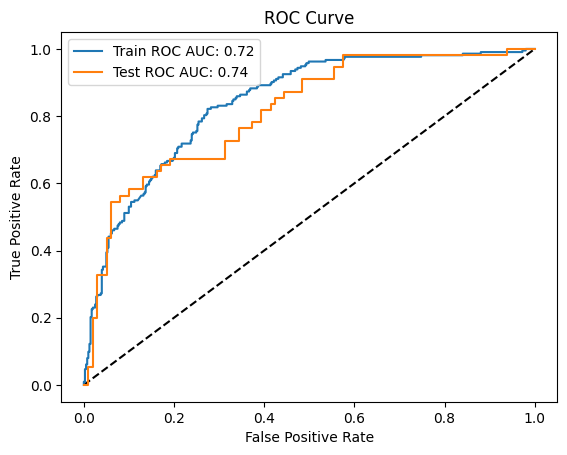


Confusion Matrix:


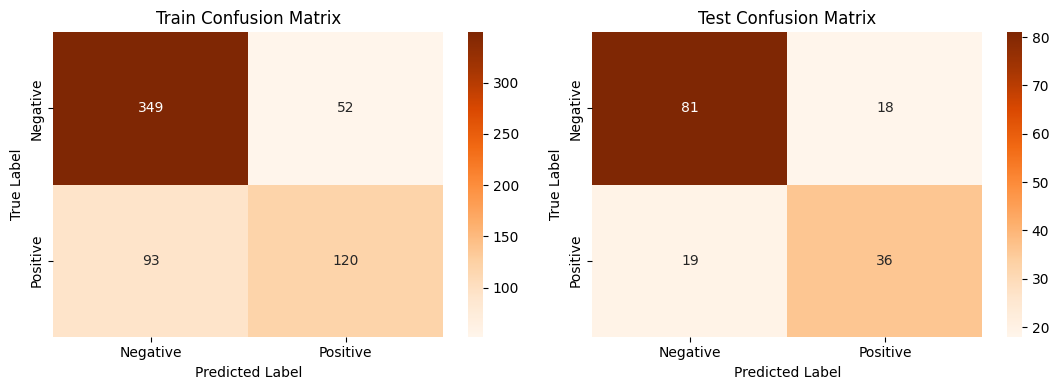


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.789593 | 0.870324 |   0.827995 | 401        |
| 1            |    0.697674 | 0.56338  |   0.623377 | 213        |
| accuracy     |    0.763844 | 0.763844 |   0.763844 |   0.763844 |
| macro avg    |    0.743634 | 0.716852 |   0.725686 | 614        |
| weighted avg |    0.757706 | 0.763844 |   0.757012 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.81     | 0.818182 |   0.81407  |  99       |
| 1            |    0.666667 | 0.654545 |   0.66055  |  55       |
| accuracy     |    0.75974  | 0.75974  |   0.75974  |   0.75974 |
| macro avg    |    0.738333 | 0.736364 |   0.73731  | 154       |
| weighted avg |    0.75881  | 0.75974  |   0.759242 | 154     

In [233]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

In [234]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242


Cross- Validation & Hyperparameter Tuning

In [235]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': np.int64(3), 'C': np.float64(5.7)}


In [236]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.7180991184011802
Test ROC AUC: 0.7363636363636363


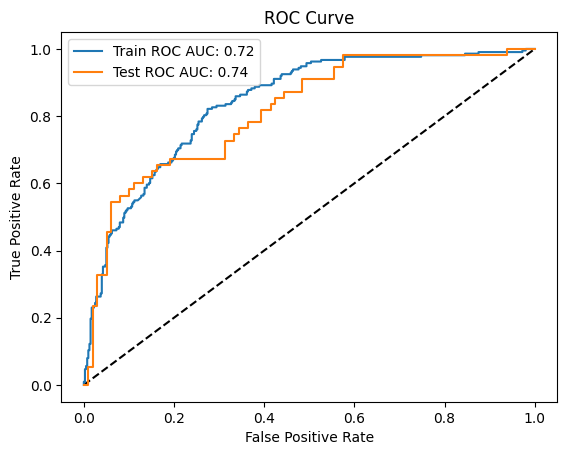


Confusion Matrix:


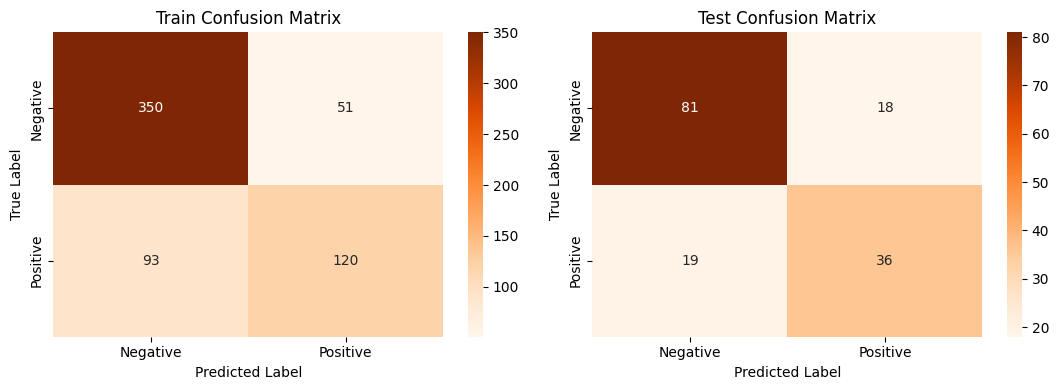


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.790068 | 0.872818 |   0.829384 | 401        |
| 1            |    0.701754 | 0.56338  |   0.625    | 213        |
| accuracy     |    0.765472 | 0.765472 |   0.765472 |   0.765472 |
| macro avg    |    0.745911 | 0.718099 |   0.727192 | 614        |
| weighted avg |    0.759431 | 0.765472 |   0.758482 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.81     | 0.818182 |   0.81407  |  99       |
| 1            |    0.666667 | 0.654545 |   0.66055  |  55       |
| accuracy     |    0.75974  | 0.75974  |   0.75974  |   0.75974 |
| macro avg    |    0.738333 | 0.736364 |   0.73731  | 154       |
| weighted avg |    0.75881  | 0.75974  |   0.759242 | 154     

In [237]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_train, X_test, y_train, y_test)

In [238]:
score['SVM tuned'] = svm2_score

Compare scores

In [239]:
# Updated Evaluation metric Score Chart
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242


Candidate Model 5: Xtreme Gradient Boosting

In [240]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 1.0
Test ROC AUC: 0.6959595959595959


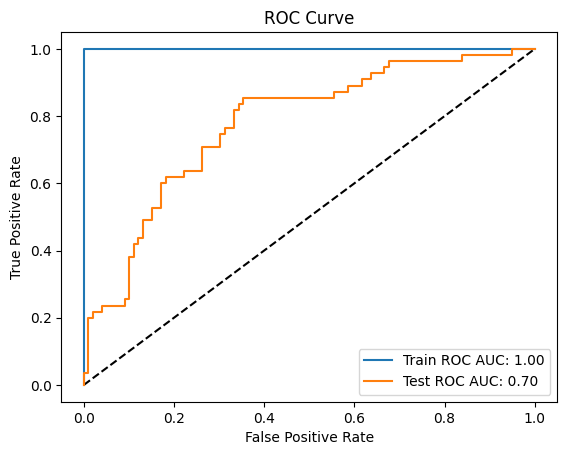


Confusion Matrix:


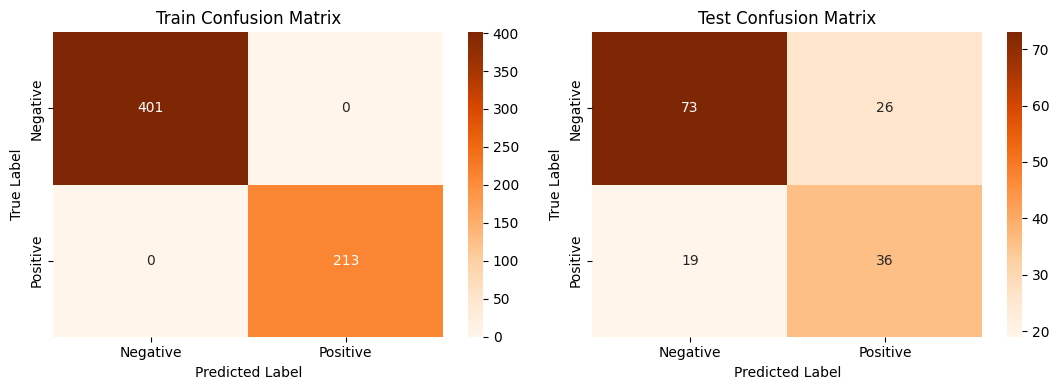


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       401 |
| 1            |           1 |        1 |          1 |       213 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       614 |
| weighted avg |           1 |        1 |          1 |       614 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.793478 | 0.737374 |   0.764398 |  99        |
| 1            |    0.580645 | 0.654545 |   0.615385 |  55        |
| accuracy     |    0.707792 | 0.707792 |   0.707792 |   0.707792 |
| macro avg    |    0.687062 | 0.69596  |   0.689891 | 154        |
| weighted avg |    0.717466 | 0.707792 |   0.711179 | 154      

In [241]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

In [242]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431,1.000000
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810,0.717466
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099,1.000000
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364,0.695960
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482,1.000000
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242,0.711179


Cross- Validation & Hyperparameter Tuning

In [243]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(160), 'max_depth': np.int64(7), 'learning_rate': np.float64(0.09999999999999999)}


In [244]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)
     


Train ROC AUC: 1.0
Test ROC AUC: 0.7151515151515152


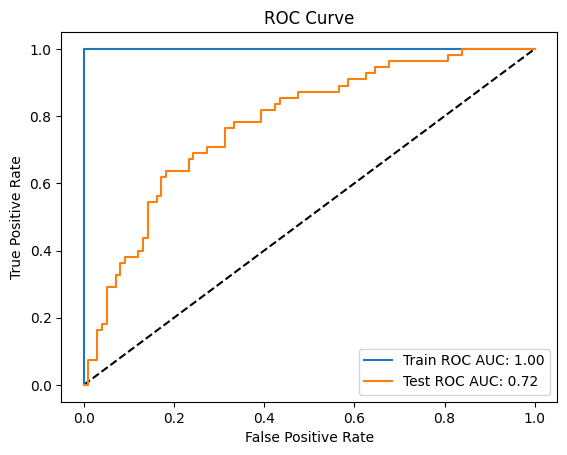


Confusion Matrix:


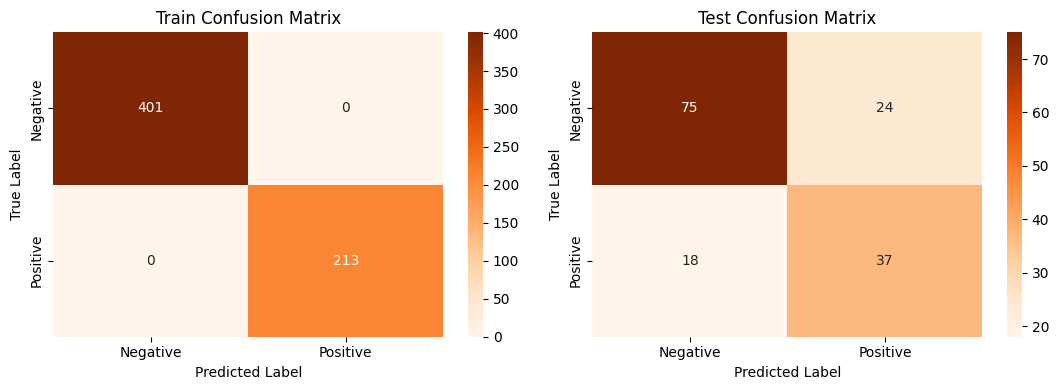


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       401 |
| 1            |           1 |        1 |          1 |       213 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       614 |
| weighted avg |           1 |        1 |          1 |       614 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.806452 | 0.757576 |   0.78125  |  99        |
| 1            |    0.606557 | 0.672727 |   0.637931 |  55        |
| accuracy     |    0.727273 | 0.727273 |   0.727273 |   0.727273 |
| macro avg    |    0.706504 | 0.715152 |   0.709591 | 154        |
| weighted avg |    0.735061 | 0.727273 |   0.730065 | 154      

In [245]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_train, X_test, y_train, y_test)

In [246]:
score['XGB tuned'] = xgb2_score

Compare scores

In [247]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431,1.000000,1.000000
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810,0.717466,0.735061
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099,1.000000,1.000000
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364,0.695960,0.715152
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482,1.000000,1.000000
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242,0.711179,0.730065


Candidate Model 6: Naive Bayes

In [248]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.7148736140868487
Test ROC AUC: 0.7636363636363634


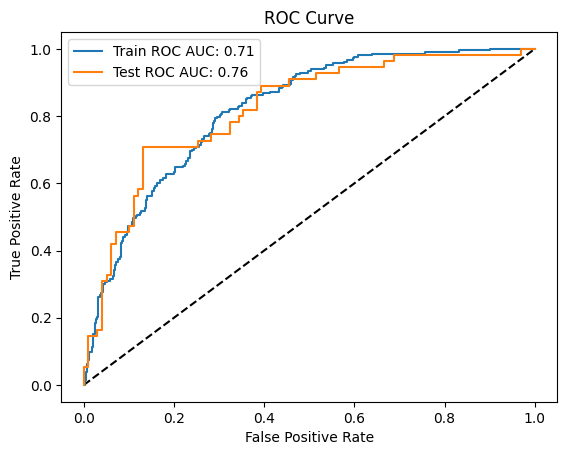


Confusion Matrix:


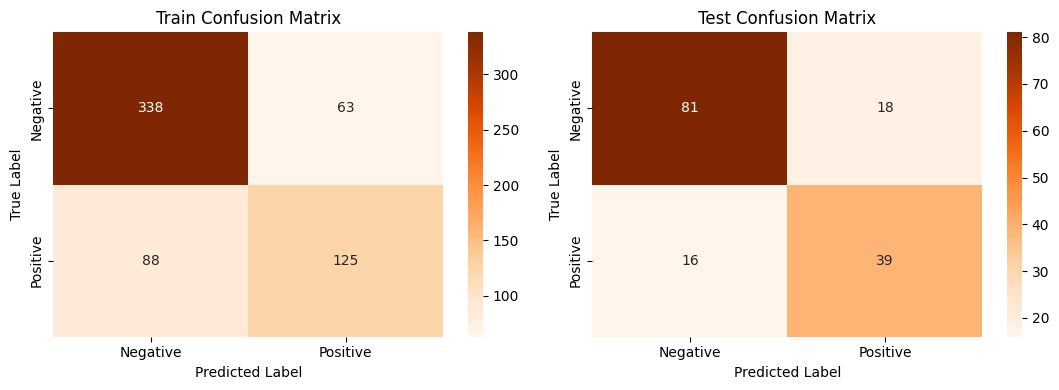


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.793427 | 0.842893 |   0.817412 | 401        |
| 1            |    0.664894 | 0.586854 |   0.623441 | 213        |
| accuracy     |    0.754072 | 0.754072 |   0.754072 |   0.754072 |
| macro avg    |    0.72916  | 0.714874 |   0.720427 | 614        |
| weighted avg |    0.748838 | 0.754072 |   0.750123 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.835052 | 0.818182 |   0.826531 |  99        |
| 1            |    0.684211 | 0.709091 |   0.696429 |  55        |
| accuracy     |    0.779221 | 0.779221 |   0.779221 |   0.779221 |
| macro avg    |    0.759631 | 0.763636 |   0.76148  | 154        |
| weighted avg |    0.78118  | 0.779221 |   0.780066 | 15

In [249]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

In [250]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431,1.000000,1.000000,0.748838
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810,0.717466,0.735061,0.781180
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099,1.000000,1.000000,0.714874
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364,0.695960,0.715152,0.763636
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482,1.000000,1.000000,0.750123
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242,0.711179,0.730065,0.780066


Cross-validation and hyperparameter tuning

In [251]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.43287612810830584)}


In [252]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.6859670073642186
Test ROC AUC: 0.7161616161616161


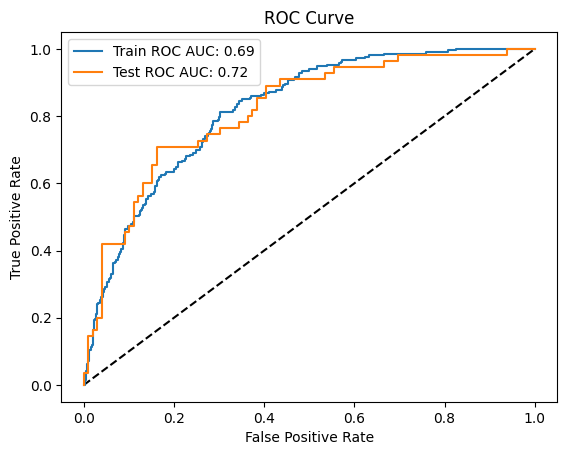


Confusion Matrix:


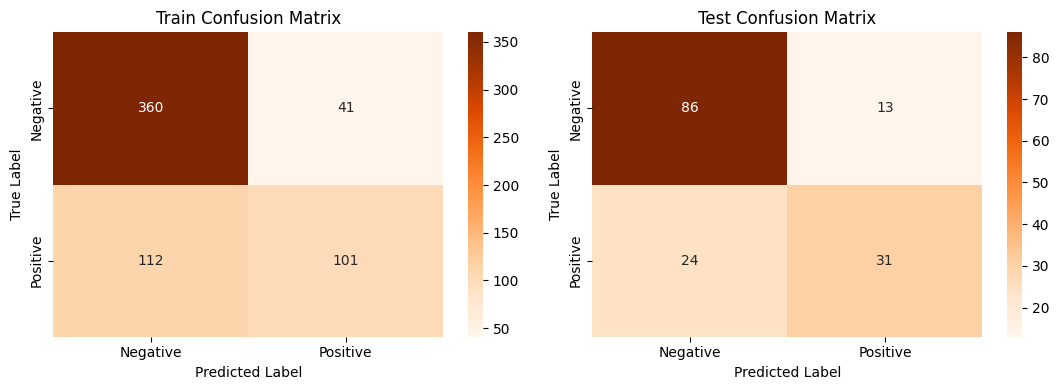


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.762712 | 0.897756 |   0.824742 | 401        |
| 1            |    0.711268 | 0.474178 |   0.569014 | 213        |
| accuracy     |    0.750814 | 0.750814 |   0.750814 |   0.750814 |
| macro avg    |    0.73699  | 0.685967 |   0.696878 | 614        |
| weighted avg |    0.744866 | 0.750814 |   0.736029 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.781818 | 0.868687 |   0.822967 |  99       |
| 1            |    0.704545 | 0.563636 |   0.626263 |  55       |
| accuracy     |    0.75974  | 0.75974  |   0.75974  |   0.75974 |
| macro avg    |    0.743182 | 0.716162 |   0.724615 | 154       |
| weighted avg |    0.754221 | 0.75974  |   0.752715 | 154     

In [253]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_train, X_test, y_train, y_test)

In [254]:
score['Naive Bayes tuned']= nb2_score

Compare scores

In [255]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431,1.000000,1.000000,0.748838,0.744866
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810,0.717466,0.735061,0.781180,0.754221
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072,0.750814
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221,0.759740
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072,0.750814
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221,0.759740
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099,1.000000,1.000000,0.714874,0.685967
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364,0.695960,0.715152,0.763636,0.716162
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482,1.000000,1.000000,0.750123,0.736029
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242,0.711179,0.730065,0.780066,0.752715


Candidate Model 7: Neural Network

In [256]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.7671021975577489
Test ROC AUC: 0.7222222222222221


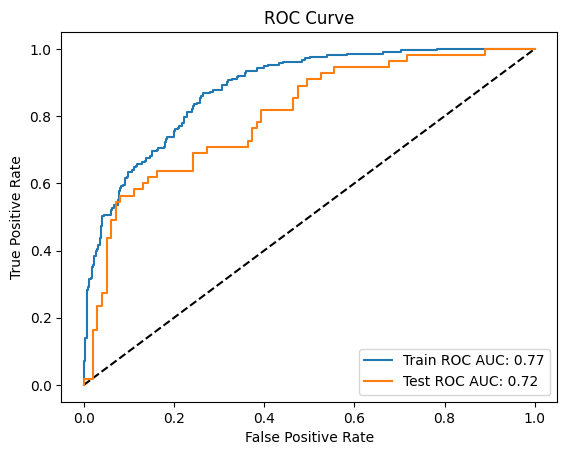


Confusion Matrix:


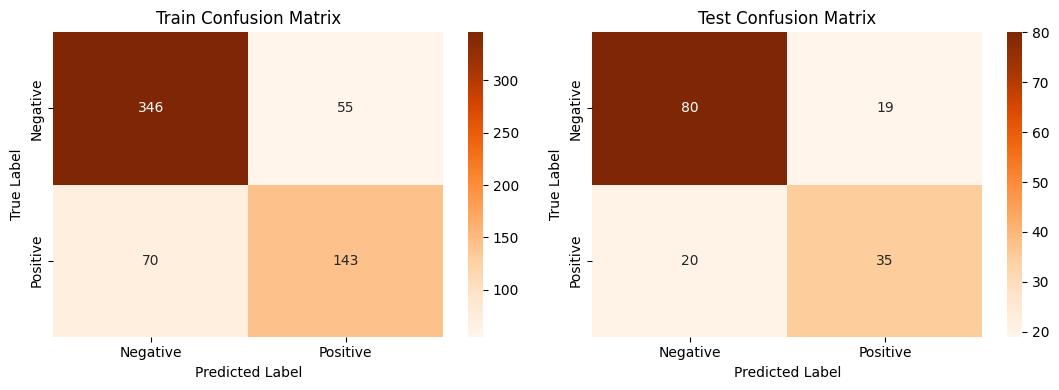


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.831731 | 0.862843 |   0.847001 | 401        |
| 1            |    0.722222 | 0.671362 |   0.695864 | 213        |
| accuracy     |    0.796417 | 0.796417 |   0.796417 |   0.796417 |
| macro avg    |    0.776976 | 0.767102 |   0.771432 | 614        |
| weighted avg |    0.793742 | 0.796417 |   0.794571 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.8      | 0.808081 |   0.80402  |  99        |
| 1            |    0.648148 | 0.636364 |   0.642202 |  55        |
| accuracy     |    0.746753 | 0.746753 |   0.746753 |   0.746753 |
| macro avg    |    0.724074 | 0.722222 |   0.723111 | 154        |
| weighted avg |    0.745767 | 0.746753 |   0.746228 | 15

In [257]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, X_train, X_test, y_train, y_test)

In [258]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431,1.000000,1.000000,0.748838,0.744866,0.793742
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810,0.717466,0.735061,0.781180,0.754221,0.745767
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072,0.750814,0.796417
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221,0.759740,0.746753
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072,0.750814,0.796417
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221,0.759740,0.746753
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099,1.000000,1.000000,0.714874,0.685967,0.767102
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364,0.695960,0.715152,0.763636,0.716162,0.722222
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482,1.000000,1.000000,0.750123,0.736029,0.794571
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242,0.711179,0.730065,0.780066,0.752715,0.746228


Cross-validation and hyperparameter tuning

In [259]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': np.int64(20), 'alpha': np.float64(0.0033)}


In [260]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)
     


Train ROC AUC: 0.7329153641717303
Test ROC AUC: 0.7232323232323232


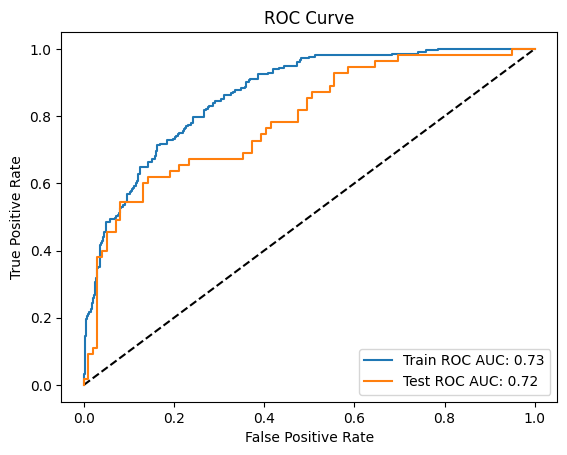


Confusion Matrix:


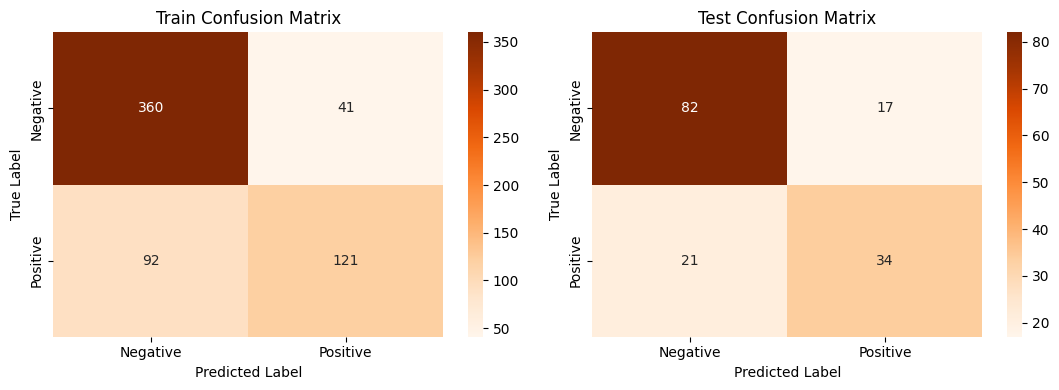


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.79646  | 0.897756 |   0.84408  | 401        |
| 1            |    0.746914 | 0.568075 |   0.645333 | 213        |
| accuracy     |    0.783388 | 0.783388 |   0.783388 |   0.783388 |
| macro avg    |    0.771687 | 0.732915 |   0.744707 | 614        |
| weighted avg |    0.779272 | 0.783388 |   0.775133 | 614        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.796117 | 0.828283 |   0.811881 |  99        |
| 1            |    0.666667 | 0.618182 |   0.641509 |  55        |
| accuracy     |    0.753247 | 0.753247 |   0.753247 |   0.753247 |
| macro avg    |    0.731392 | 0.723232 |   0.726695 | 154        |
| weighted avg |    0.749884 | 0.753247 |   0.751034 | 15

In [261]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, X_train, X_test, y_train, y_test)
     

In [262]:
score['Neural Network tuned']= neural2_score

Compare scores

In [263]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.762951,0.759408,1.000000,0.812355,1.000000,0.902420,0.757706,0.759431,1.000000,1.000000,0.748838,0.744866,0.793742,0.779272
Precision Test,0.758810,0.758810,0.804451,0.766234,0.757844,0.763008,0.758810,0.758810,0.717466,0.735061,0.781180,0.754221,0.745767,0.749884
Recall Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072,0.750814,0.796417,0.783388
Recall Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221,0.759740,0.746753,0.753247
Accuracy Train,0.768730,0.765472,1.000000,0.814332,1.000000,0.902280,0.763844,0.765472,1.000000,1.000000,0.754072,0.750814,0.796417,0.783388
Accuracy Test,0.759740,0.759740,0.785714,0.766234,0.753247,0.759740,0.759740,0.759740,0.707792,0.727273,0.779221,0.759740,0.746753,0.753247
ROC-AUC Train,0.719492,0.716999,1.000000,0.788522,1.000000,0.878965,0.716852,0.718099,1.000000,1.000000,0.714874,0.685967,0.767102,0.732915
ROC-AUC Test,0.736364,0.736364,0.792929,0.745455,0.739394,0.744444,0.736364,0.736364,0.695960,0.715152,0.763636,0.716162,0.722222,0.723232
F1 macro Train,0.761004,0.758064,1.000000,0.813010,1.000000,0.900783,0.757012,0.758482,1.000000,1.000000,0.750123,0.736029,0.794571,0.775133
F1 macro Test,0.759242,0.759242,0.789509,0.766234,0.755032,0.761081,0.759242,0.759242,0.711179,0.730065,0.780066,0.752715,0.746228,0.751034


In [264]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.762951 |                    0.759408 |        1        |              0.812355 |        1        |              0.90242  | 0.757706 |    0.759431 | 1        |    1        |      0.748838 |            0.744866 |         0.793742 |               0.779272 |
| Precision Test  |              0.75881  |                    0.75881  |        0.804451 |              0.766234 |        0.75784

Selection of Best Model

In [265]:
# Removing the overfitted models which have recall, ROC-AUC, f1 scores for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']==1].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)         #creating a new dataframe with required models
adj
     

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,ROC-AUC Train,ROC-AUC Test,F1 macro Train,F1 macro Test
Logistic regression,0.762951,0.758810,0.768730,0.759740,0.768730,0.759740,0.719492,0.736364,0.761004,0.759242
Logistic regression tuned,0.759408,0.758810,0.765472,0.759740,0.765472,0.759740,0.716999,0.736364,0.758064,0.759242
Decision Tree tuned,0.812355,0.766234,0.814332,0.766234,0.814332,0.766234,0.788522,0.745455,0.813010,0.766234
Random Forest tuned,0.902420,0.763008,0.902280,0.759740,0.902280,0.759740,0.878965,0.744444,0.900783,0.761081
SVM,0.757706,0.758810,0.763844,0.759740,0.763844,0.759740,0.716852,0.736364,0.757012,0.759242
SVM tuned,0.759431,0.758810,0.765472,0.759740,0.765472,0.759740,0.718099,0.736364,0.758482,0.759242
Naive Bayes,0.748838,0.781180,0.754072,0.779221,0.754072,0.779221,0.714874,0.763636,0.750123,0.780066
Naive Bayes tuned,0.744866,0.754221,0.750814,0.759740,0.750814,0.759740,0.685967,0.716162,0.736029,0.752715
Neural Network,0.793742,0.745767,0.796417,0.746753,0.796417,0.746753,0.767102,0.722222,0.794571,0.746228
Neural Network tuned,0.779272,0.749884,0.783388,0.753247,0.783388,0.753247,0.732915,0.723232,0.775133,0.751034


In [266]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [267]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes - 0.7812
Recall: Naive Bayes - 0.7792
Accuracy: Naive Bayes - 0.7792
ROC-AUC: Naive Bayes - 0.7636
F1 macro: Naive Bayes - 0.7801


The metrics used for final model selection is recall to maximize true positives and minimize false negatives

In [268]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=score_smpl['Recall Test']].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','ROC-AUC Train','ROC-AUC Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Naive Bayes            |       0.754072 |      0.779221 |
| Naive Bayes tuned      |       0.750814 |      0.75974  |


Conclusion: Final model selected based on recall is Naive bayes